In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Naive_Bayes_Data.csv")

In [3]:
df.head()

,Glucose,Blood Presure,Diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values
X

array([[40, 85],
       [40, 92],
       [45, 63],
       [45, 80],
       [40, 73],
       [45, 82],
       [40, 85],
       [30, 63],
       [65, 65],
       [45, 82],
       [35, 73],
       [45, 90],
       [50, 68],
       [40, 93],
       [35, 80],
       [50, 70],
       [40, 73],
       [40, 67],
       [40, 75],
       [40, 80],
       [40, 72],
       [40, 88],
       [40, 78],
       [45, 98],
       [40, 88],
       [60, 67],
       [40, 85],
       [40, 88],
       [45, 78],
       [55, 73],
       [45, 77],
       [50, 68],
       [45, 77],
       [40, 85],
       [45, 70],
       [45, 72],
       [45, 90],
       [40, 65],
       [45, 88],
       [45, 88],
       [40, 68],
       [40, 73],
       [45, 88],
       [45, 78],
       [45, 85],
       [40, 83],
       [40, 63],
       [45, 73],
       [45, 90],
       [45, 87],
       [40, 90],
       [45, 93],
       [50, 73],
       [40, 68],
       [50, 68],
       [50, 90],
       [50, 75],
       [50, 85],
       [45, 83

In [5]:
y

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
print(X_train)
X_test = sc_X.fit_transform(X_test)
print(X_test)

[[ 0.25143268  1.1714076 ]
 [-0.59429542  0.59809965]
 [-1.44002351 -1.69513216]
 [ 0.25143268  0.36877647]
 [ 0.25143268  1.51539237]
 [ 0.25143268  0.0247917 ]
 [-2.2857516  -0.20453149]
 [-0.59429542 -0.77783944]
 [ 0.25143268  0.25411488]
 [ 0.25143268  1.51539237]
 [-0.59429542  0.94208442]
 [-0.59429542 -0.54851626]
 [ 1.09716077 -0.54851626]
 [ 1.94288886 -1.35114739]
 [ 0.25143268  0.94208442]
 [-0.59429542  1.40073078]
 [-0.59429542 -0.54851626]
 [ 0.25143268  0.94208442]
 [-0.59429542 -0.77783944]
 [-0.59429542 -0.77783944]
 [ 1.09716077 -1.12182421]
 [-0.59429542 -1.46580898]
 [-0.59429542 -1.35114739]
 [ 0.25143268  0.94208442]
 [ 0.25143268  0.25411488]
 [ 1.09716077  0.94208442]
 [ 1.09716077 -1.69513216]
 [-0.59429542  0.59809965]
 [ 0.25143268 -1.12182421]
 [ 0.25143268 -0.20453149]
 [-0.59429542  1.1714076 ]
 [ 0.25143268  1.1714076 ]
 [ 0.25143268 -0.89250103]
 [ 0.25143268  2.08870032]
 [ 1.09716077 -0.77783944]
 [-1.44002351 -0.77783944]
 [ 1.09716077 -1.35114739]
 

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)


GaussianNB()

In [9]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

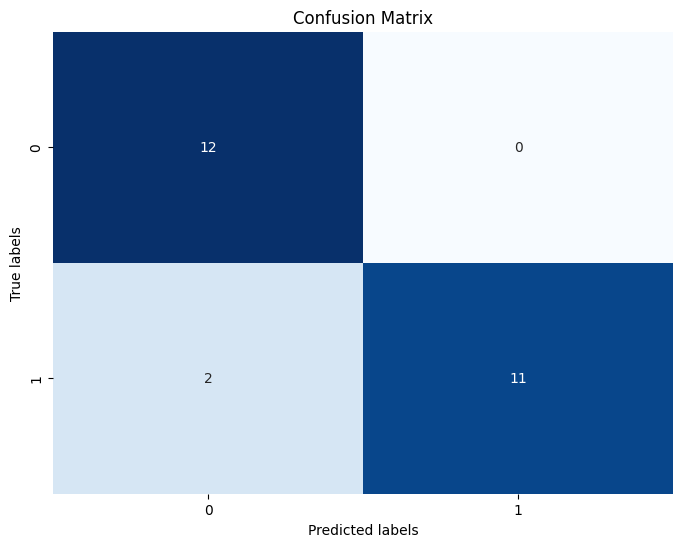

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.92
Precision: 0.9314285714285714
Recall: 0.92
F1-score: 0.9197435897435898
